<a href="https://colab.research.google.com/github/rai-shi/Machine-Learning-Gelecegi-Yazanlar/blob/main/lasso_regresyon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [54]:
import numpy as np
import pandas as pd

from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import model_selection

import matplotlib.pyplot as plt
from sklearn.linear_model import RidgeCV, LassoCV

In [55]:
# get dataset
df = pd.read_csv("/content/Hitters.csv")
# drop null values
df = df.dropna()
# categoric to dummy (one hot encoding)
dms = pd.get_dummies(df[["League", "Division", "NewLeague"]])
# label
Y = df["Salary"]
# drop label and categoric columns
X_ = df.drop(["Salary", "League", "Division", "NewLeague"], axis=1).astype("float64")
# features with remains and dummies
X = pd.concat([X_, dms[["League_N", "Division_W", "NewLeague_N"]]], axis=1)

In [56]:
df.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N
5,594,169,4,74,51,35,11,4408,1133,19,501,336,194,A,W,282,421,25,750.0,A


In [57]:
df.shape

(263, 20)

In [58]:
X.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,League_N,Division_W,NewLeague_N
1,315.0,81.0,7.0,24.0,38.0,39.0,14.0,3449.0,835.0,69.0,321.0,414.0,375.0,632.0,43.0,10.0,True,True,True
2,479.0,130.0,18.0,66.0,72.0,76.0,3.0,1624.0,457.0,63.0,224.0,266.0,263.0,880.0,82.0,14.0,False,True,False
3,496.0,141.0,20.0,65.0,78.0,37.0,11.0,5628.0,1575.0,225.0,828.0,838.0,354.0,200.0,11.0,3.0,True,False,True
4,321.0,87.0,10.0,39.0,42.0,30.0,2.0,396.0,101.0,12.0,48.0,46.0,33.0,805.0,40.0,4.0,True,False,True
5,594.0,169.0,4.0,74.0,51.0,35.0,11.0,4408.0,1133.0,19.0,501.0,336.0,194.0,282.0,421.0,25.0,False,True,False


In [59]:
X.shape

(263, 19)

In [60]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=42)

In [61]:
lasso_model = Lasso().fit(x_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.257e+06, tolerance: 3.899e+03
  model = cd_fast.enet_coordinate_descent(


In [62]:
lasso_model

Lasso()

In [63]:
lasso_model.intercept_

-5.587450677336506

In [64]:
lasso_model.coef_

array([-1.74875691e+00,  8.59204135e+00,  6.67993798e+00, -3.06715333e+00,
       -1.91843070e+00,  5.32372890e+00,  8.39184117e+00, -1.63172447e-01,
       -8.22311277e-02, -3.93602861e-01,  1.71118530e+00,  6.55730545e-01,
       -6.48379405e-01,  2.59815358e-01,  2.73041157e-01, -4.41440454e-01,
        8.54474011e+01, -9.59701213e+01, -2.13086605e+01])

In [65]:
# farklı lambda değerlerine karşılık katsayılar

In [66]:
lasso = Lasso()
coefs = []
alphas = np.random.randint(0,100000,10)
for a in alphas:
  lasso.set_params(alpha=a)
  lasso.fit(x_train, y_train)
  coefs.append(lasso.coef_)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.731e+03, tolerance: 3.899e+03
  model = cd_fast.enet_coordinate_descent(


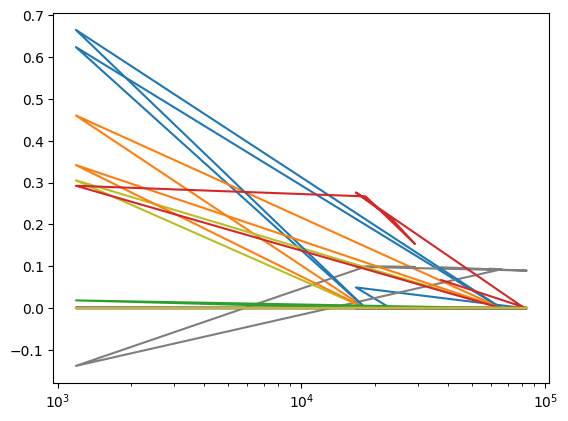

In [67]:
ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale("log")

In [68]:
lasso = Lasso()
coefs = []
alphas = 10**np.linspace(10,-2,100)*0.5
for a in alphas:
  lasso.set_params(alpha=a)
  lasso.fit(x_train, y_train)
  coefs.append(lasso.coef_)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.470e+03, tolerance: 3.899e+03
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.540e+03, tolerance: 3.899e+03
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.002e+03, tolerance: 3.899e

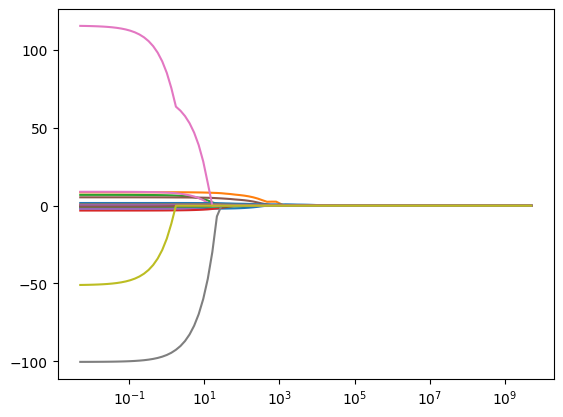

In [69]:
ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale("log")

In [70]:
lasso_model

Lasso()

In [71]:
lasso_model.predict(x_train)[0:5]

array([377.26270596, 786.51524513, 495.14140718, 117.19492966,
       429.04228506])

In [72]:
lasso_model.predict(x_test)[0:5]

array([ 609.18826367,  696.96810702, 1009.06157391,  412.22773375,
        409.25851712])

In [73]:
y_pred = lasso_model.predict(x_test)

In [74]:
np.sqrt(mean_squared_error(y_test, y_pred))

356.0975884554034

In [75]:
r2_score(y_test, y_pred)
# regresyon problemleri için çok önemli bir değerdir
# başarı metriklerinde incelenmesi gereken bir değerdir.
# modelin kurulduğu bağımsız değişkenlerce bağımlı değişkenin açıklanabilme değeridir.

0.41422798132366156

In [76]:
# model tuning
lasso_cv_model = LassoCV(cv=10, max_iter=100000).fit(x_train, y_train)
lasso_cv_model.alpha_

563.4670501833853

In [77]:
lasso_tuned = Lasso()
lasso_tuned.set_params(alpha=lasso_cv_model.alpha_)
lasso_tuned.fit(x_train, y_train)

Lasso(alpha=563.4670501833853)

In [78]:
y_pred = lasso_tuned.predict(x_test)

In [79]:
np.sqrt(mean_squared_error(y_test, y_pred))

373.59572250697937

In [80]:
r2_score(y_test, y_pred)

0.35524555123514934

In [81]:
lasso_cv_model = LassoCV(alphas = alphas, cv=10, max_iter=100000).fit(x_train, y_train)
lasso_tuned = Lasso()
lasso_tuned.set_params(alpha=lasso_cv_model.alpha_)
lasso_tuned.fit(x_train, y_train)
y_pred = lasso_tuned.predict(x_test)

In [82]:
np.sqrt(mean_squared_error(y_test, y_pred))

363.6832708037447

In [83]:
r2_score(y_test, y_pred)

0.3890056339154283

In [86]:
# anlamsız katsayılar alpha büyüdükçe sıfırlanmaktaydı

pd.Series(lasso_tuned.coef_, index=x_train.columns)

,0
AtBat,-1.052276
Hits,5.342648
HmRun,0.000000
Runs,0.000000
RBI,0.000000
Walks,2.640006
Years,0.000000
CAtBat,-0.174125
CHits,0.249805
CHmRun,-0.000000
